In [ ]:
!pip install pybullet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.5/80.5 MB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pybullet: filename=pybullet-3.2.7-cp312-cp312-linux_x86_64.whl size=99873163 sha256=62a6e344b31d6355fa2828872f2facab744e64730a90da349d0bacfdabc9f2c4
  Stored in directory: /root/.cache/pip/wheels/72/95/1d/b336e5ee612ae9a019bfff4dc0bedd100ee6f0570db205fdf8
Successfully built pybullet


In [ ]:
import pybullet as p
import pybullet_data
import time
import os
import matplotlib.pyplot as plt
from PIL import Image
from IPython.display import display
import numpy as np

In [ ]:
p.disconnect()

In [ ]:
p.connect(p.DIRECT)
p.setAdditionalSearchPath(pybullet_data.getDataPath())
p.resetSimulation()

In [ ]:
def create_urdf_files(output_dir):
    os.makedirs(output_dir, exist_ok=True)
    urdfs = {
        "table.urdf": """
        <robot name="table">
          <link name="base">
            <visual>
              <geometry>
                <box size="9 4.8 0.03"/>
              </geometry>
              <material name="accent_blue">
                <color rgba="0.6784313725490196 0.5058823529411764 0.3137254901960784 1.0"/>
              </material>
            </visual>
            <collision>
              <geometry>
                <box size="9 4.8 0.03"/>
              </geometry>
            </collision>
          </link>
            <link name="leg1">
            <visual>
              <geometry>
                <cylinder radius="0.04" length="1"/>
              </geometry>
              <material name="green">
                <color rgba="1 0 0 1"/>
              </material>
            </visual>
          </link>
          <link name="leg2">
            <visual>
              <geometry>
                <cylinder radius="0.04" length="1"/>
              </geometry>
              <material name="wood3">
                <color rgba="1 0 0 1"/>
              </material>
            </visual>
          </link>
          <link name="leg3">
            <visual>
              <geometry>
                <cylinder radius="0.04" length="1"/>
              </geometry>
              <material name="wood">
                <color rgba="1 0 0 1"/>
              </material>
            </visual>
          </link>
          <link name="leg4">
            <visual>
              <geometry>
                <cylinder radius="0.04" length="1"/>
              </geometry>
              <material name="wood">
                <color rgba="1 0 0 1"/>
              </material>
            </visual>
          </link>
          <joint name="joint_leg1" type="fixed">
            <parent link="base"/>
            <child link="leg1"/>
            <origin xyz="4.3 2.2 -0.515" rpy="0 0 0"/>
          </joint>
          <joint name="joint_leg2" type="fixed">
            <parent link="base"/>
            <child link="leg2"/>
            <origin xyz="-4.3 2.2 -0.515" rpy="0 0 0"/>
          </joint>
          <joint name="joint_leg3" type="fixed">
            <parent link="base"/>
            <child link="leg3"/>
            <origin xyz="4.3 -2.2 -0.515" rpy="0 0 0"/>
          </joint>
          <joint name="joint_leg4" type="fixed">
            <parent link="base"/>
            <child link="leg4"/>
            <origin xyz="-4.3 -2.2 -0.515" rpy="0 0 0"/>
          </joint>
        </robot>
        """,
        "wall.urdf": """
        <robot name="wall">
          <link name="base_link">
            <visual>
              <geometry>
                <box size="0.1 1.5 1"/>
              </geometry>
              <material name="red">
                <color rgba="1 0 0 1"/>
              </material>
            </visual>
          </link>
        </robot>
        """,
        "wall1.urdf": """
        <robot name="wall1">
          <link name="base_link">
            <visual>
              <geometry>
                <box size="1.5 0.1 1"/>
              </geometry>
            </visual>
          </link>
        </robot>
        """,
        "red_cube.urdf": """
        <robot name="red_cube">
          <link name="cube_link">
            <visual>
              <geometry>
                <box size="0.6 0.6 0.6"/>
              </geometry>
              <material name="red">
                <color rgba="1 0 0 1"/>
              </material>
            </visual>

            <collision>
              <geometry>
                <box size="0.6 0.6 0.6"/>
              </geometry>
            </collision>

            <inertial>
              <mass value="0.1"/>
              <inertia ixx="0.0001" ixy="0.0" ixz="0.0"
                      iyy="0.0001" iyz="0.0"
                      izz="0.0001"/>
              <origin xyz="0 0 0" rpy="0 0 0"/>
            </inertial>
          </link>
        </robot>
        """,
        "cylinder.urdf": """
        <robot name="cylinder">
          <link name="cylinder_link">
            <visual>
              <geometry>
                <cylinder radius="0.4" length="0.8"/>
              </geometry>
              <material name="Green">
                <color rgba="0 1 0 1"/>
              </material>
            </visual>
            <collision>
              <geometry>
                <cylinder radius="0.1" length="0.5"/>
              </geometry>
            </collision>
            <inertial>
              <mass value="1.0"/>
              <origin xyz="0 0 0" rpy="0 0 0"/>
              <inertia ixx="0.01" ixy="0.0" ixz="0.0" iyy="0.01" iyz="0.0" izz="0.01"/>
            </inertial>
          </link>
        </robot>
        """,
        "simple_bot.urdf": """
        <robot name="simple_bot">
          <link name="base_link">
            <visual>
              <geometry>
                <box size="0.5 0.3 0.1"/>
              </geometry>
              <material name="blue">
                <color rgba="1 1 0 1"/>
              </material>
            </visual>
          </link>
          <link name="left_wheel">
            <visual>
              <geometry>
                <cylinder radius="0.1" length="0.05"/>
              </geometry>
              <origin rpy="1.5707 0 0" xyz="0 0.175 0"/>
              <material name="black">
                <color rgba="0.1 0.1 0.1 1.0"/>
              </material>
            </visual>
          </link>
          <link name="right_wheel">
            <visual>
              <geometry>
                <cylinder radius="0.1" length="0.05"/>
              </geometry>
              <origin rpy="1.5707 0 0" xyz="0 -0.175 0"/>
              <material name="black"/>
            </visual>
          </link>
          <joint name="base_to_left_wheel" type="fixed">
            <parent link="base_link"/>
            <child link="left_wheel"/>
          </joint>
          <joint name="base_to_right_wheel" type="fixed">
            <parent link="base_link"/>
            <child link="right_wheel"/>
          </joint>
        </robot>
        """,
        "cake.urdf": """
        <robot name="cake">
          <link name="base_footprint"></link>
          <joint name="base_joint" type="fixed">
            <parent link="base_footprint" />
            <child link="base_link" />
            <origin xyz="0 0 0.2385199730273837" rpy="0 0 0" />
          </joint>
          <link name="base_link">
            <visual>
              <origin xyz="0 0 0" rpy="0 0 0" />
              <geometry>
                <cylinder radius="0.7568650413115681" length="0.46091635590866087" />
              </geometry>
              <material name="base_link-material">
                <color rgba="0.396078431372549 0.21568627450980393 0.0 1.0" />
              </material>
            </visual>
            <inertial>
              <origin xyz="0 0 0" rpy="0 0 0" />
              <mass value="1" />
              <inertia ixx="0.3333333333333333" ixy="0" ixz="0" iyy="0.5" iyz="0" izz="0.3333333333333333" />
            </inertial>
          </link>
          <joint name="base_link_to_cylinder1" type="fixed">
            <parent link="base_link" />
            <child link="cylinder1" />
            <origin xyz="0.01615549796966853 -0.015325672416956149 0.2614800269726163" rpy="0 0 0" />
          </joint>
          <link name="cylinder1">
            <visual>
              <origin xyz="0 0 0" rpy="0 0 0" />
              <geometry>
                <cylinder radius="0.5" length="0.7052967351916553" />
              </geometry>
              <material name="cylinder1-material">
                <color rgba="0.07618538147321911 0.008023192982520563 0.5583403896257968 1" />
              </material>
            </visual>
            <inertial>
              <origin xyz="0 0 0" rpy="0 0 0" />
              <mass value="1" />
              <inertia ixx="0.3333333333333333" ixy="0" ixz="0" iyy="0.5" iyz="0" izz="0.3333333333333333" />
            </inertial>
          </link>
        </robot>
        """,
        "object.urdf": """
        <robot name="object">
          <link name="base_footprint"></link>
          <joint name="base_joint" type="fixed">
            <parent link="base_footprint" />
            <child link="base_link" />
            <origin xyz="0 0 0.5" rpy="0 0 0" />
          </joint>
          <link name="base_link">
            <visual>
              <origin xyz="0 0 0" rpy="0 0 0" />
              <geometry>
                <box size="0.5 0.7 0.3" />
              </geometry>
              <material name="base_link-material">
                <color rgba="0.396078431372549 0.21568627450980393 0.0 1.0" />
              </material>
            </visual>
            <inertial>
              <origin xyz="0 0 0" rpy="0 0 0" />
              <mass value="1" />
              <inertia ixx="0.16666666666666666" ixy="0" ixz="0" iyy="0.16666666666666666" iyz="0" izz="0.16666666666666666" />
            </inertial>
          </link>
        </robot>
        """,
        "sphere.urdf": """
        <robot name="sphere">
          <link name="base_footprint"></link>
          <joint name="base_joint" type="fixed">
            <parent link="base_footprint" />
            <child link="base_link" />
            <origin xyz="0 0 0.5" rpy="0 0 0" />
          </joint>
          <link name="base_link">
            <visual>
              <origin xyz="0 0 0" rpy="0 0 0" />
              <geometry>
                <sphere radius="0.5" />
              </geometry>
              <material name="base_link-material">
                <color rgba="0.03954623527052923 0.46778379610254284 0.008568125615105716 1" />
              </material>
            </visual>
            <collision>
              <origin xyz="0 0 0" rpy="0 0 0" />
              <geometry>
                <sphere radius="0.5" />
              </geometry>
            </collision>
            <inertial>
              <origin xyz="0 0 0" rpy="0 0 0" />
              <mass value="1" />
              <inertia ixx="0.4" ixy="0" ixz="0" iyy="0.4" iyz="0" izz="0.4" />
            </inertial>
          </link>
        </robot>
        """,
    }
    for filename, content in urdfs.items():
         os.makedirs("urdf", exist_ok=True)
         with open(f"urdf/{filename}", "w") as f:
             f.write(content)

In [ ]:
create_urdf_files("/content/urdf")

In [ ]:
def setup(urdf_dir):
        a = []
        p.setAdditionalSearchPath(pybullet_data.getDataPath())
        p.loadURDF("plane.urdf")

        positions = [
            [1, 1, 1],
            [-2.3, 1, 1.52],
            [-1.0, 1.5, 1.52],
            [1, 1.5, 1.32],
            [1, -0.5, 1.42],
            [3, 1, 1],
            [4, 2, 0.65],
            [-2.5, 2.5, 1],
          ]
        urdfs = [
            "table.urdf",
            "wall.urdf",
            "wall1.urdf",
            "red_cube.urdf",
            "cylinder.urdf",
            "cake.urdf",
            "object.urdf",
            "sphere.urdf",
        ]

        for pos, urdf in zip(positions, urdfs):
            obj_id = p.loadURDF(os.path.join(urdf_dir, urdf), pos)
            a.append(obj_id)

def Movement(botname, pos, orn):
    p.resetBasePositionAndOrientation(botname, pos, orn)

def camera():
  width = 1200
  height = 760
  img_arr = p.getCameraImage(
      width,
      height,
      viewMatrix=p.computeViewMatrixFromYawPitchRoll(
          cameraTargetPosition=[1, 1, 1],
          distance=10,
          yaw=180,
          pitch=-90,
          roll=0,
          upAxisIndex=2,
      ),
      projectionMatrix=p.computeProjectionMatrixFOV(
          fov=60,
          aspect=width/height,
          nearVal=0.01,
          farVal=100,
      ),
      shadow=True,
      lightDirection=[0, 0, 1],
  )

  width, height, rgba, depth, mask = img_arr

  # Convert the image data to numpy arrays
  rgba = np.array(rgba).reshape(height, width, -1)
  depth = np.array(depth).reshape(height, width)
  mask = np.array(mask).reshape(height, width)


  print(f"rgba shape={rgba.shape}, dtype={rgba.dtype}")
  display(Image.fromarray(rgba, 'RGBA'))


def camera1():
  width = 1200
  height = 760
  img_arr = p.getCameraImage(
      width,
      height,
      viewMatrix=p.computeViewMatrixFromYawPitchRoll(
          cameraTargetPosition=[1, 1, 1],
          distance=10,
          yaw=90,
          pitch=-80,
          roll=0,
          upAxisIndex=2,
      ),
      projectionMatrix=p.computeProjectionMatrixFOV(
          fov=60,
          aspect=width/height,
          nearVal=0.01,
          farVal=100,
      ),
      shadow=True,
      lightDirection=[0, 0, 1],
  )

  width, height, rgba, depth, mask = img_arr

  # Convert the image data to numpy arrays
  rgba = np.array(rgba).reshape(height, width, -1)
  depth = np.array(depth).reshape(height, width)
  mask = np.array(mask).reshape(height, width)


  print(f"rgba shape={rgba.shape}, dtype={rgba.dtype}")
  display(Image.fromarray(rgba, 'RGBA'))


def camera2():
  width = 1200
  height = 760
  img_arr = p.getCameraImage(
      width,
      height,
      viewMatrix=p.computeViewMatrixFromYawPitchRoll(
          cameraTargetPosition=[1, 1, 1],
          distance=10,
          yaw=180,
          pitch=-60,
          roll=0,
          upAxisIndex=2,
      ),
      projectionMatrix=p.computeProjectionMatrixFOV(
          fov=60,
          aspect=width/height,
          nearVal=0.01,
          farVal=100,
      ),
      shadow=True,
      lightDirection=[0, 0, 1],
  )

  width, height, rgba, depth, mask = img_arr

  # Convert the image data to numpy arrays
  rgba = np.array(rgba).reshape(height, width, -1)
  depth = np.array(depth).reshape(height, width)
  mask = np.array(mask).reshape(height, width)


  print(f"rgba shape={rgba.shape}, dtype={rgba.dtype}")
  display(Image.fromarray(rgba, 'RGBA'))

def remove(obj_name):
  p.removeBody(obj_name)


In [ ]:
setup("/content/urdf")
simple_bot = p.loadURDF('/content/urdf/simple_bot.urdf', [-3, 1, 1.12])

rgba shape=(760, 1200, 4), dtype=uint8


/tmp/ipython-input-3499065642.py:33: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  display(Image.fromarray(rgba, 'RGBA'))


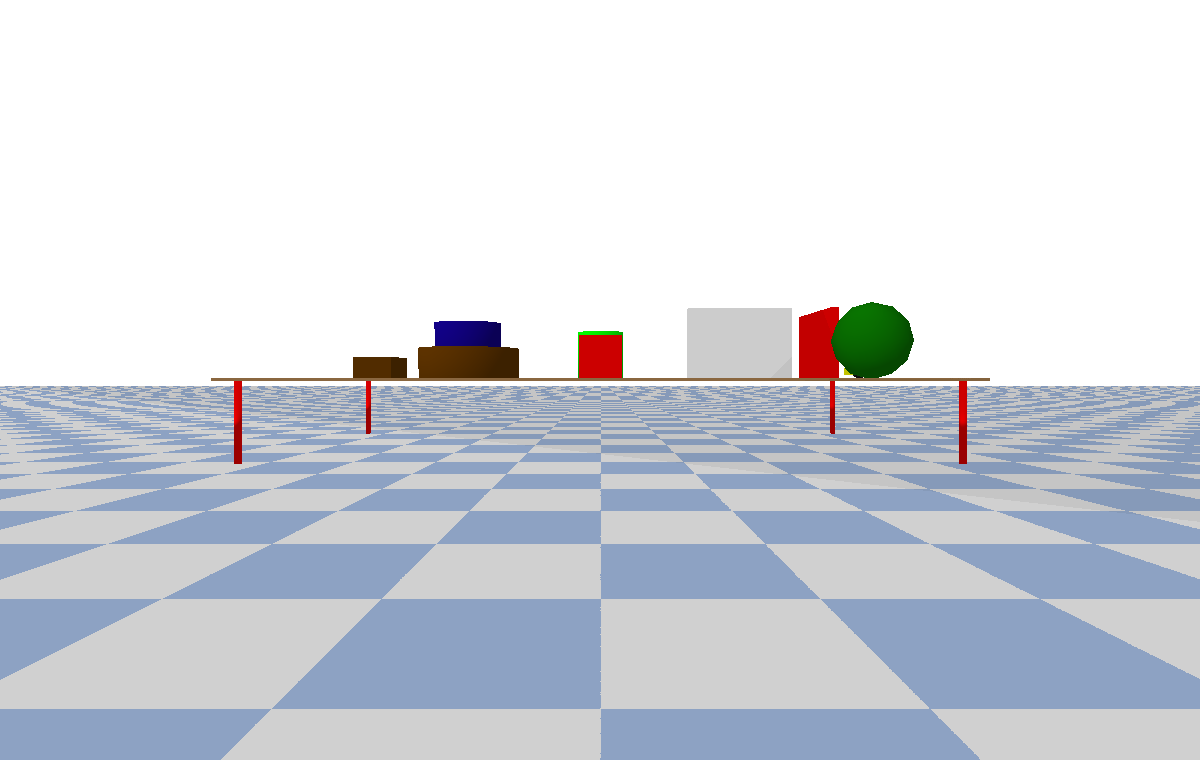

In [ ]:
width = 1200
height = 760
img_arr = p.getCameraImage(
    width,
    height,
    viewMatrix=p.computeViewMatrixFromYawPitchRoll(
        cameraTargetPosition=[1, 1, 1],
        distance=10,
        yaw=180,
        pitch=0,
        roll=0,
        upAxisIndex=2,
    ),
    projectionMatrix=p.computeProjectionMatrixFOV(
        fov=60,
        aspect=width/height,
        nearVal=0.01,
        farVal=100,
    ),
    shadow=True,
    lightDirection=[1, 1, 1],
)

width, height, rgba, depth, mask = img_arr

# Convert the image data to numpy arrays
rgba = np.array(rgba).reshape(height, width, -1)
depth = np.array(depth).reshape(height, width)
mask = np.array(mask).reshape(height, width)


print(f"rgba shape={rgba.shape}, dtype={rgba.dtype}")
display(Image.fromarray(rgba, 'RGBA'))

MovingMovingMovingMovingMoving
rgba shape=(760, 1200, 4), dtype=uint8


/tmp/ipython-input-3738713047.py:67: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  display(Image.fromarray(rgba, 'RGBA'))


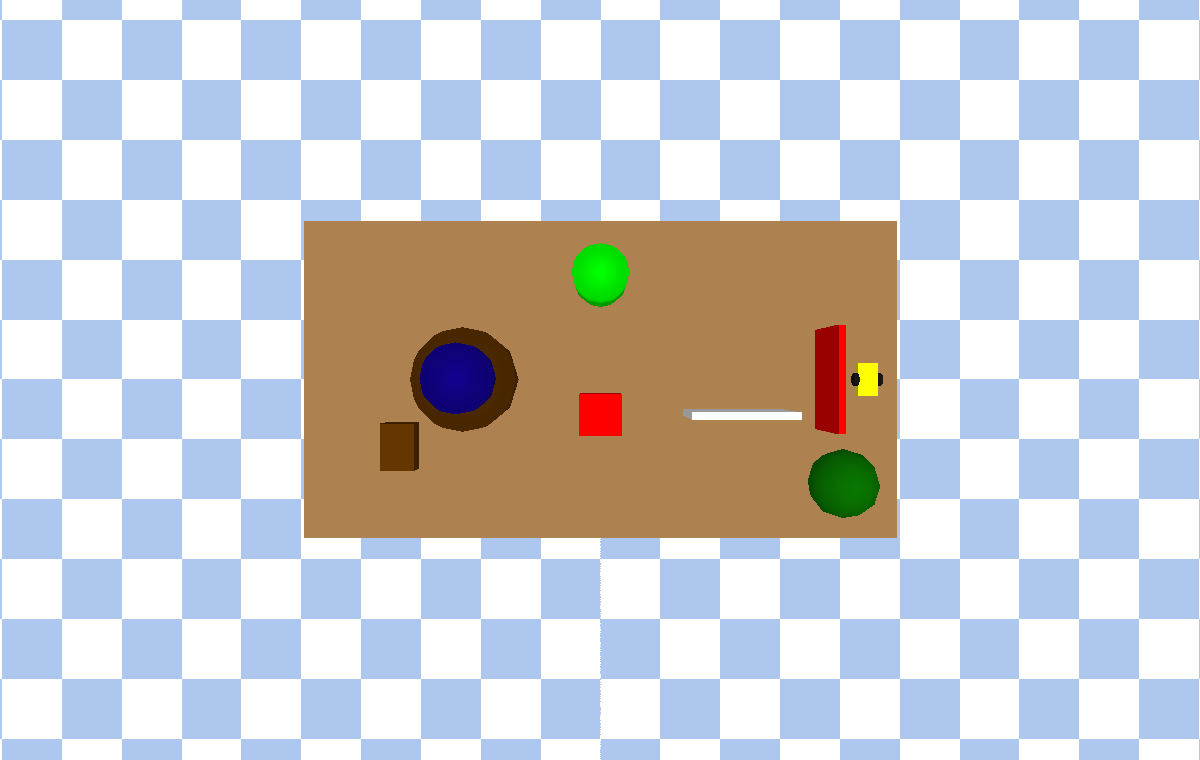

MovingMovingMovingMovingMoving
rgba shape=(760, 1200, 4), dtype=uint8


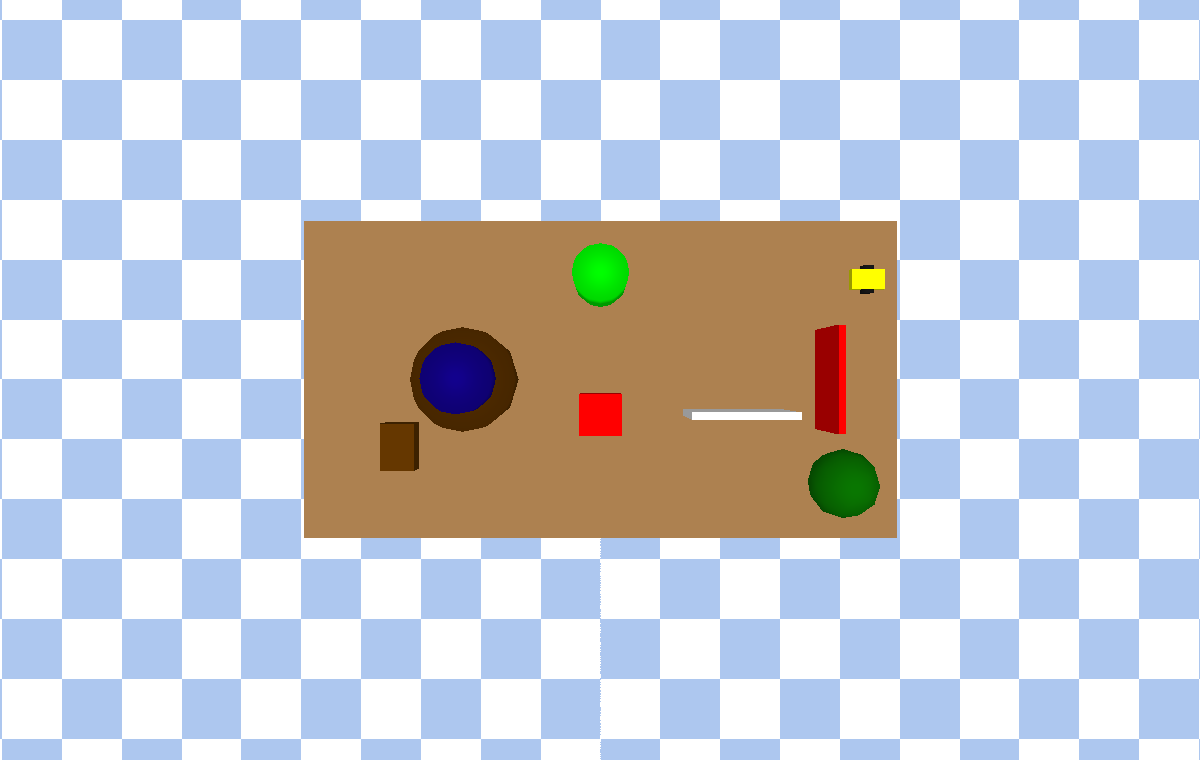

MovingMovingMovingMovingMoving
rgba shape=(760, 1200, 4), dtype=uint8


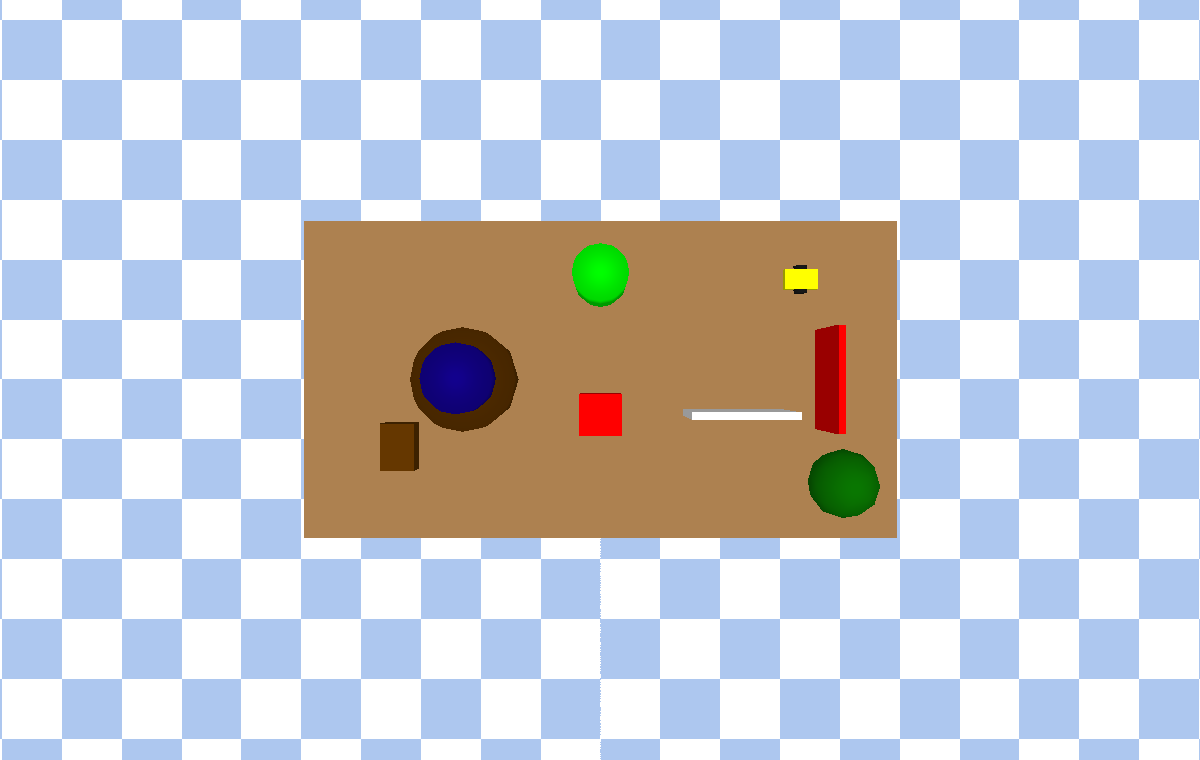

MovingMovingMovingMovingMoving
rgba shape=(760, 1200, 4), dtype=uint8


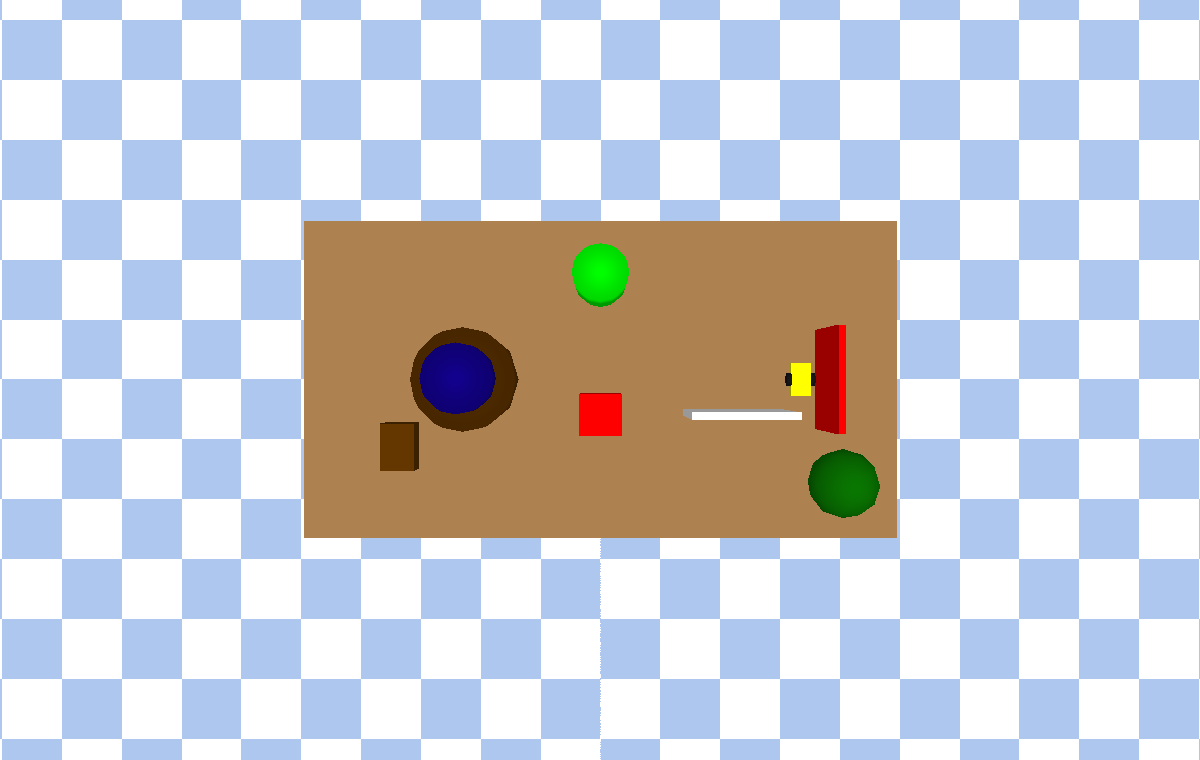

MovingMovingMovingMovingMoving
rgba shape=(760, 1200, 4), dtype=uint8


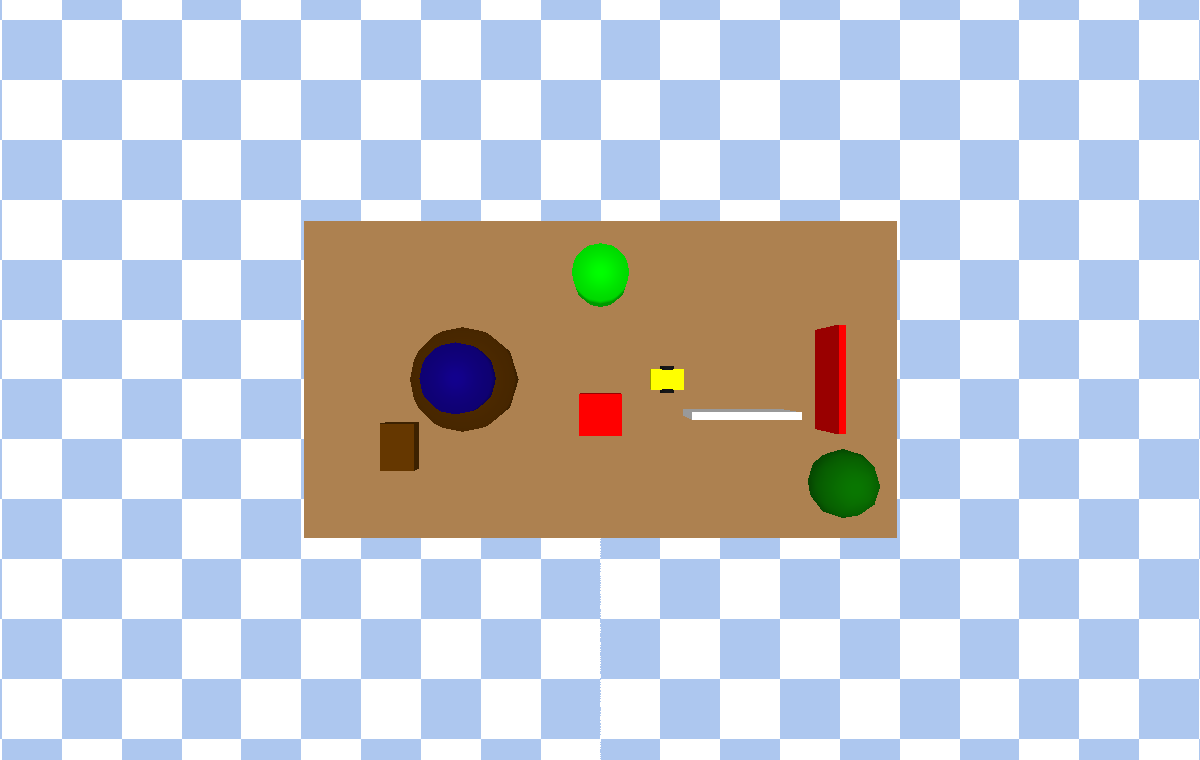

MovingMovingMovingMovingMoving
rgba shape=(760, 1200, 4), dtype=uint8


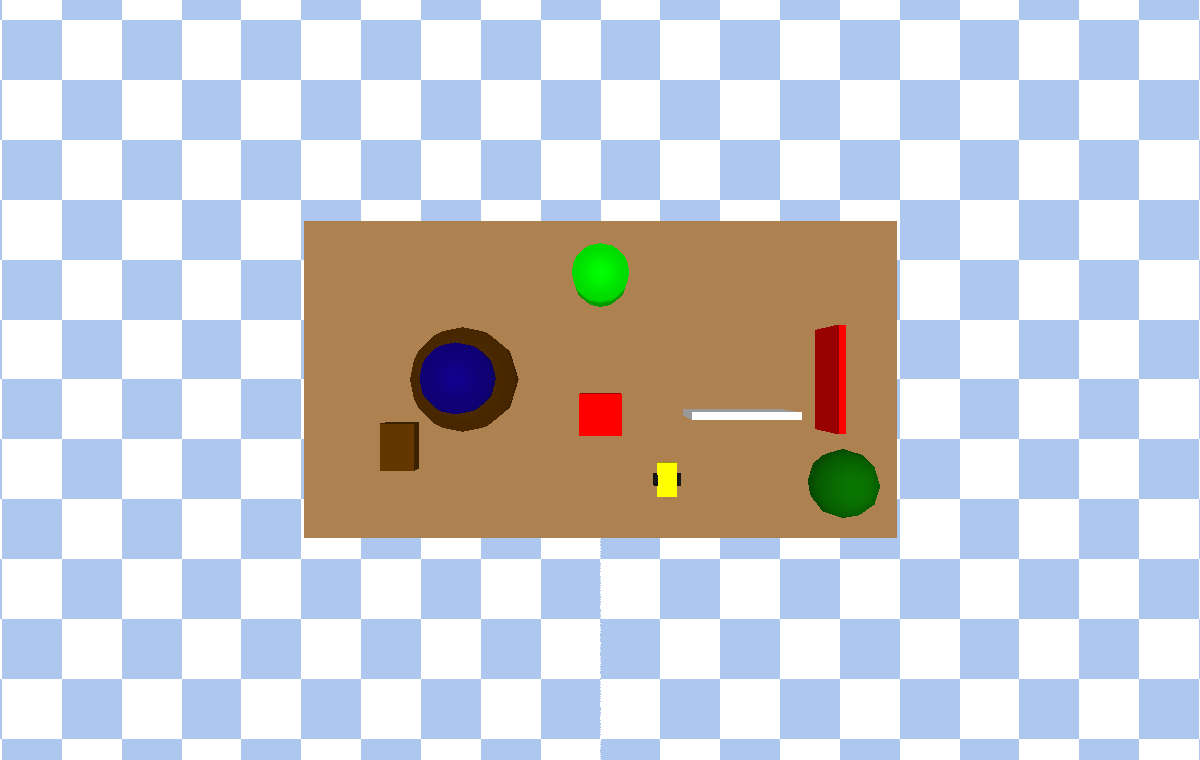

MovingMovingMovingMovingMoving
rgba shape=(760, 1200, 4), dtype=uint8


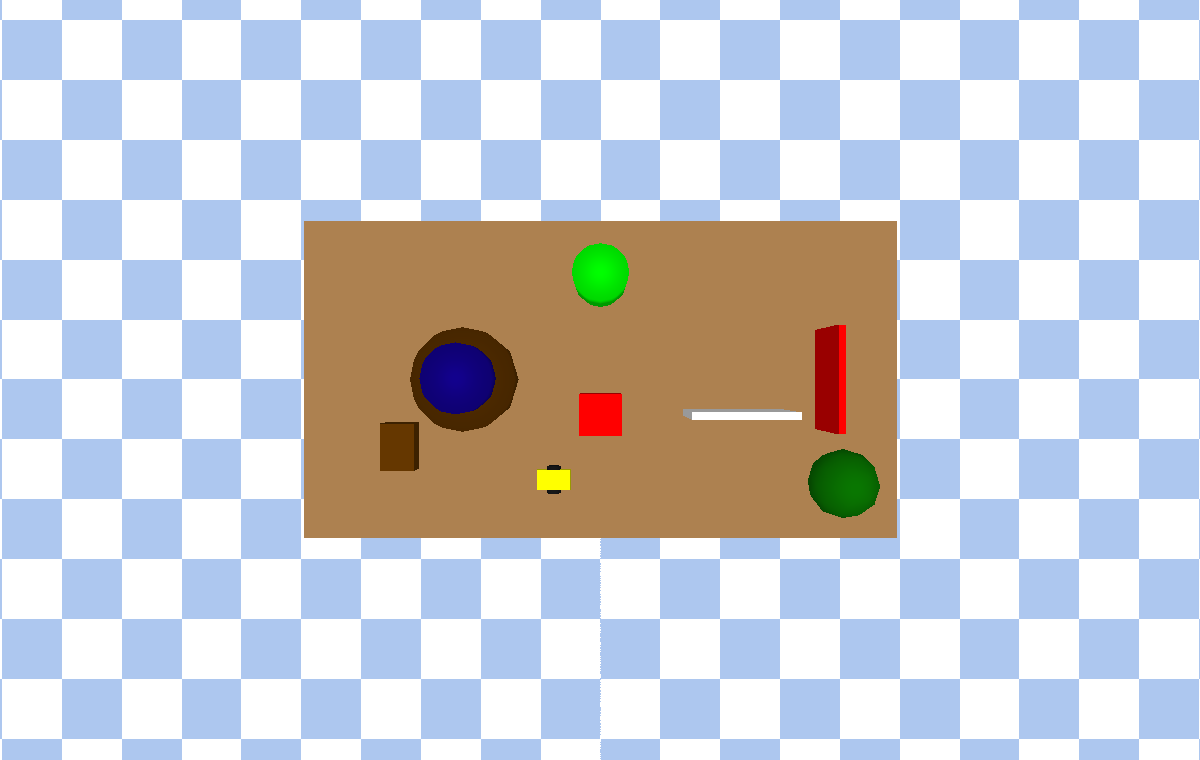

MovingMovingMovingMovingMoving
rgba shape=(760, 1200, 4), dtype=uint8


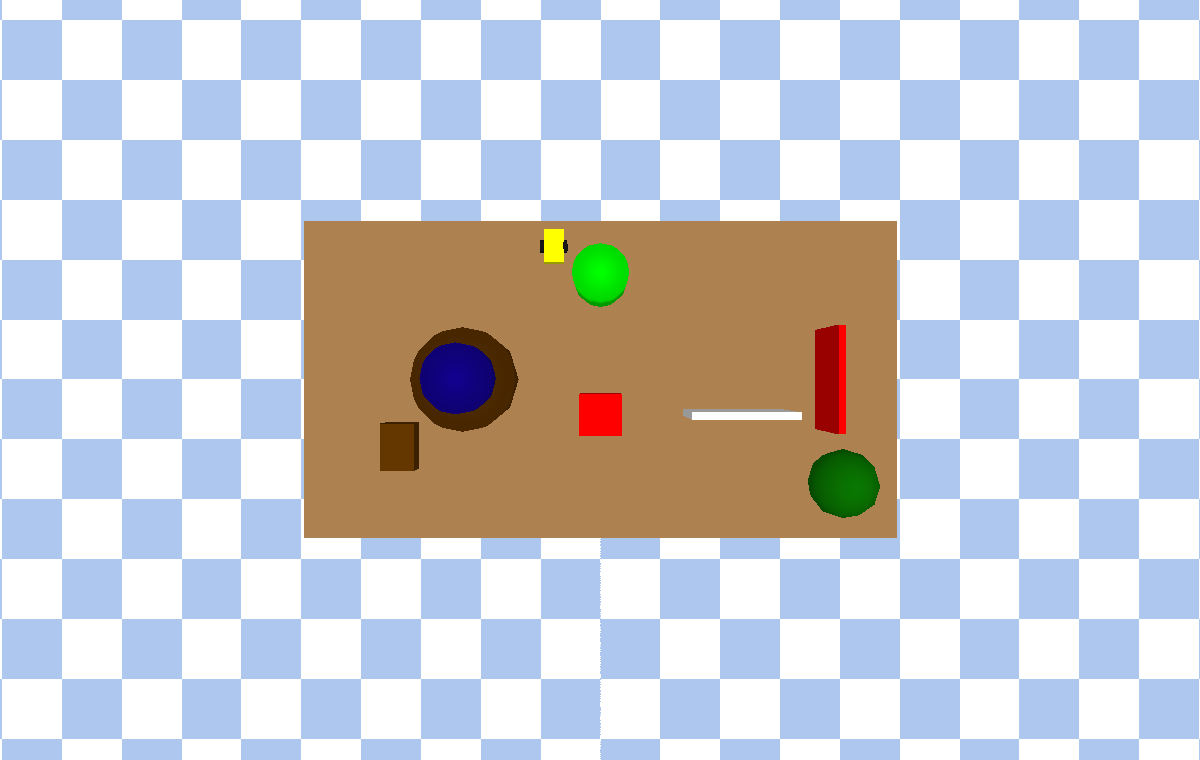

MovingMovingMovingMovingMoving
rgba shape=(760, 1200, 4), dtype=uint8


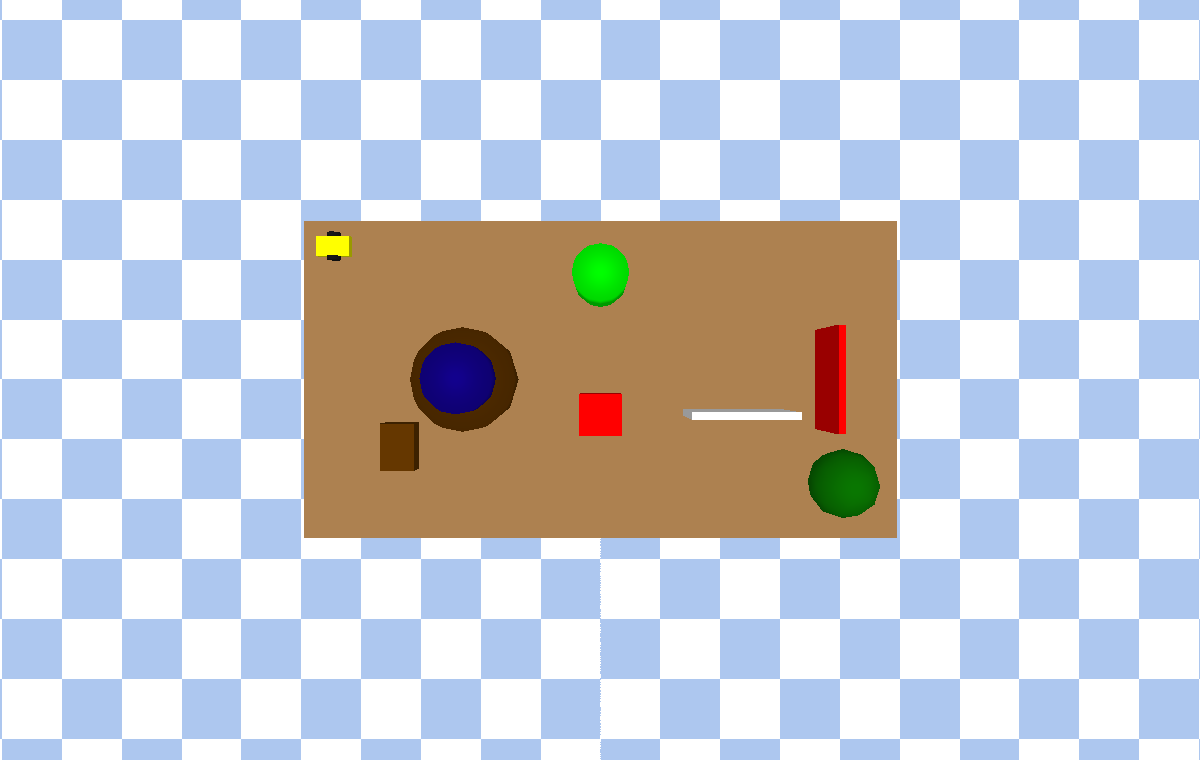

MovingMovingMovingMovingMoving
rgba shape=(760, 1200, 4), dtype=uint8


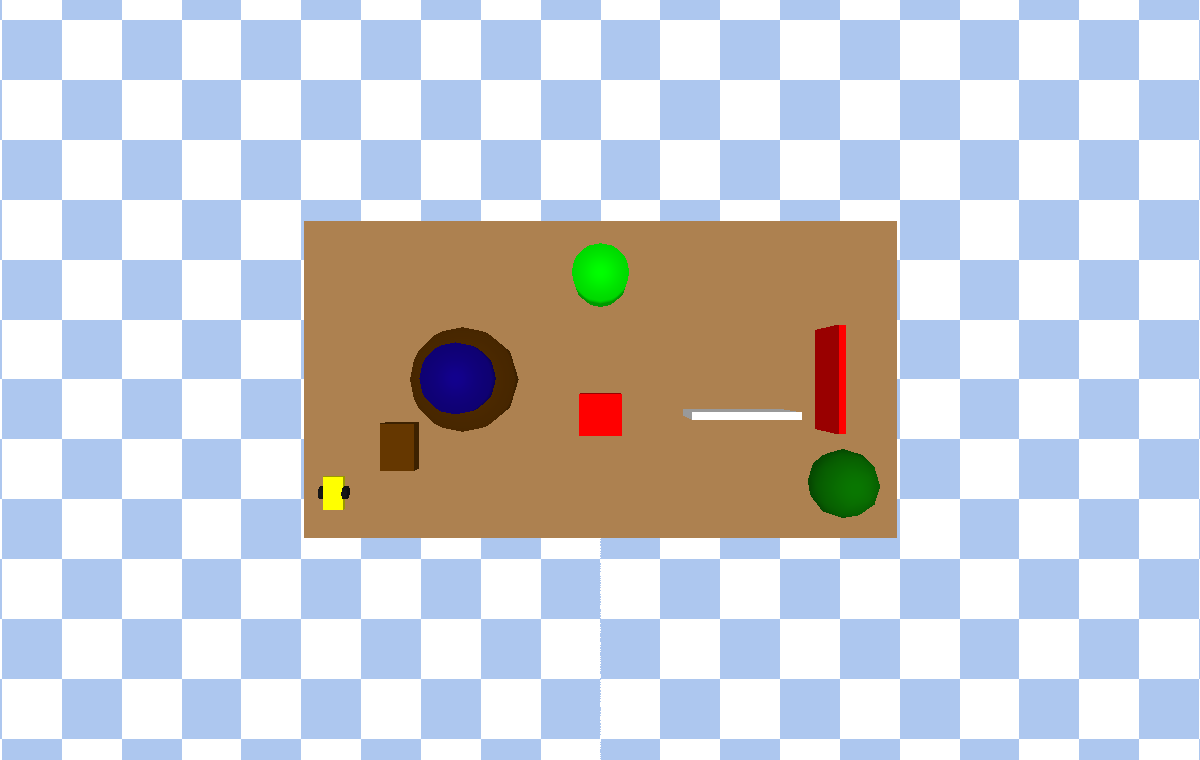

In [ ]:
positions = [
            [-3, 1, 1.12],
            [-3, -0.5, 1.12],
            [-2, -0.5, 1.12],
            [-2, 1, 1.12],
            [0, 1, 1.12],
            [0, 2.5, 1.12],
            [1.7, 2.5, 1.12],
            [1.7, -1, 1.12],
            [5, -1, 1.12],
            [5, 2.7, 1.12],

        ]
urdfs = [
            [0.0, 0.0, 1, 1],
            [0.0, 0.0, 0.0, 1],
            [0.0, 0.0, 0.0, 1],
            [0.0, 0.0, 1, 1],
            [0.0, 0.0, 0.0, 1],
            [0.0, 0.0, 1, 1],
            [0.0, 0.0, 0.0, 1],
            [0.0, 0.0, 1, 1],
            [0.0, 0.0, 0, 1],
            [0.0, 0.0, 1, 1]
        ]
for pos, urdf in zip(positions, urdfs):
  Movement(simple_bot, pos, urdf)
  print("Moving"*5)
  camera()
  # camera1()
  # camera2()
